In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Existing data points
data = {
    'Income': [186824, 332985, 409743, 126532, 235657, 318721, 147845, 482193, 190036, 397544],
    'Rating': [4, 2, 1, 5, 3, 2, 4, 1, 5, 3]
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Income,Rating
0,186824,4
1,332985,2
2,409743,1
3,126532,5
4,235657,3
5,318721,2
6,147845,4
7,482193,1
8,190036,5
9,397544,3


In [5]:
# Generate a random point within the specified range
random_point = {
    'Income': np.random.randint(100000, 500001),
    'Rating': np.random.randint(1, 6)
}

In [6]:
random_point

{'Income': 124515, 'Rating': 2}

#### No scaling

In [7]:
# Find the closest neighbor
df['Distance'] = np.sqrt((df['Income'] - random_point['Income'])**2 + (df['Rating'] - random_point['Rating'])**2)
closest_neighbor = df.loc[df['Distance'].idxmin()]

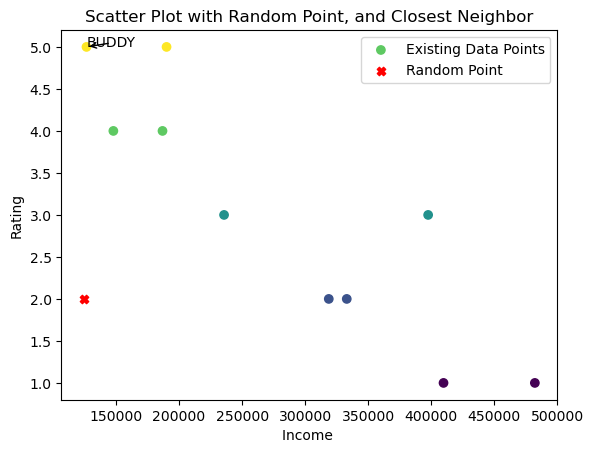

In [8]:
# Scatter plot for existing data points
plt.scatter(df['Income'], df['Rating'], c=df['Rating'], cmap='viridis', label='Existing Data Points', marker='o')

# Scatter plot for the random point
plt.scatter(random_point['Income'], random_point['Rating'], c='red', marker='X', label='Random Point')

# Annotate the closest neighbor as "BUDDY"
plt.annotate('BUDDY', 
             xy=(closest_neighbor['Income'], closest_neighbor['Rating']),
             xytext=(closest_neighbor['Income'] + 0.1, closest_neighbor['Rating']),  # Adjust text position
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Labels and title
plt.xlabel('Income ')
plt.ylabel('Rating')
plt.title('Scatter Plot with Random Point, and Closest Neighbor')

# Show legend
plt.legend()

# Show the plot
plt.show()

#### with scaling

In [9]:
# Scale the "Income" column
scaler = MinMaxScaler()
df[['Income']]         = scaler.fit_transform(df[['Income']])
random_point['Income'] = scaler.transform([[random_point['Income']]])[0][0]

D:\Anaconda-16-FEB\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [10]:
# Find the closest neighbor
df['Distance'] = np.sqrt((df['Income'] - random_point['Income'])**2 + (df['Rating'] - random_point['Rating'])**2)
closest_neighbor = df.loc[df['Distance'].idxmin()]

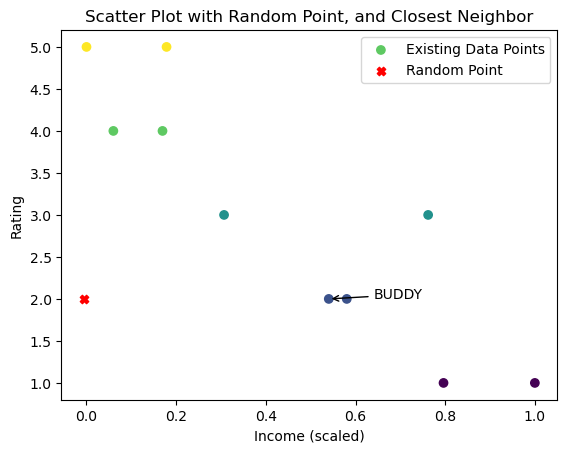

In [11]:
# Scatter plot for existing data points
plt.scatter(df['Income'], df['Rating'], c=df['Rating'], cmap='viridis', label='Existing Data Points', marker='o')

# Scatter plot for the random point
plt.scatter(random_point['Income'], random_point['Rating'], c='red', marker='X', label='Random Point')

# Annotate the closest neighbor as "BUDDY"
plt.annotate('BUDDY', 
             xy=(closest_neighbor['Income'], closest_neighbor['Rating']),
             xytext=(closest_neighbor['Income'] + 0.1, closest_neighbor['Rating']),  # Adjust text position
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Labels and title
plt.xlabel('Income (scaled)')
plt.ylabel('Rating')
plt.title('Scatter Plot with Random Point, and Closest Neighbor')

# Show legend
plt.legend()

# Show the plot
plt.show()